In [1]:
import numpy as np
import cvxpy as cvx

from copy import copy

from pympc.geometry.polytope import Polytope
from pympc.optimization.gurobi import linear_program

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
def maximum_volume_ellipsoid_inscribed_in_slice_of_polytope(A, B, c):
    """
    Given the polytope
    P := { (x,y) | A x + B y <= c },
    returns the biggest ellipsoid iscribed in the slice of P at y = \bar y, i.e.
    \pi_x(P) := {x | A x + B \bar y <= c }.
    The ellipsoid is returned in the form
    E := { x | P z + q | ||z||_2 <= 1}
    """
    nf, nx = A.shape
    ny = B.shape[1]
    P = cvx.Variable(nx, nx)
    q = cvx.Variable(nx)
    y = cvx.Variable(ny)
    objective = cvx.Maximize(cvx.log_det(P))
    constraints = [cvx.norm(P*A[i,:]) + A[i,:].T*q + B[i,:].T*y <= c[i,0] for i in range(nf)]
    prob = cvx.Problem(objective, constraints)
    result = prob.solve()
    P = np.array(P.value)
    q = np.array(q.value)
    y = np.array(y.value)
    return P, q, y

In [3]:
def draw_2d_ellipe(C, d, **kwargs):
    eigenvalues, eigenvectors = np.linalg.eig(C)
    width = eigenvalues[0]*2.
    height = eigenvalues[1]*2.
    angle = np.arctan2(eigenvectors[1,0],eigenvectors[0,0])*180./np.pi
    ell = Ellipse(xy=d, width=width, height=height, angle=angle, **kwargs)
    ax = plt.gca()
    ax.add_artist(ell)
    ax.autoscale_view()
    return

In [4]:
nx = 2
ny = 6
nf = 20
A = np.random.randn(nf, nx)
B = np.random.randn(nf, ny)
AB = np.hstack((A, B))
c = np.random.rand(nf, 1)
P, q, y = maximum_volume_ellipsoid_inscribed_in_slice_of_polytope(A, B, c)

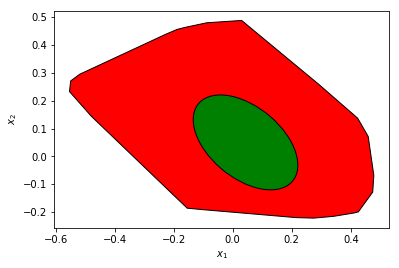

In [5]:
poly = Polytope(copy(AB), copy(c))
poly.assemble()
poly.plot(dim_proj=[0,1], facecolor='red')
draw_2d_ellipe(P, q, facecolor='green', edgecolor='black')
plt.show()

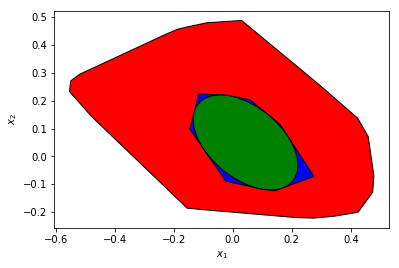

In [6]:
p_test = Polytope(copy(A), c-B.dot(y))
p_test.assemble()
poly.plot(dim_proj=[0,1], facecolor='red')
p_test.plot(facecolor='blue')
draw_2d_ellipe(P, q, facecolor='green', edgecolor='black')
plt.show()